In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [2]:
#Normalization
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()
print(X_train1.shape, Y_train1.shape)
print(X_test1.shape, Y_test1.shape)
#Without Normalization
(X_train2, Y_train2), (X_test2, Y_test2) = mnist.load_data()
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


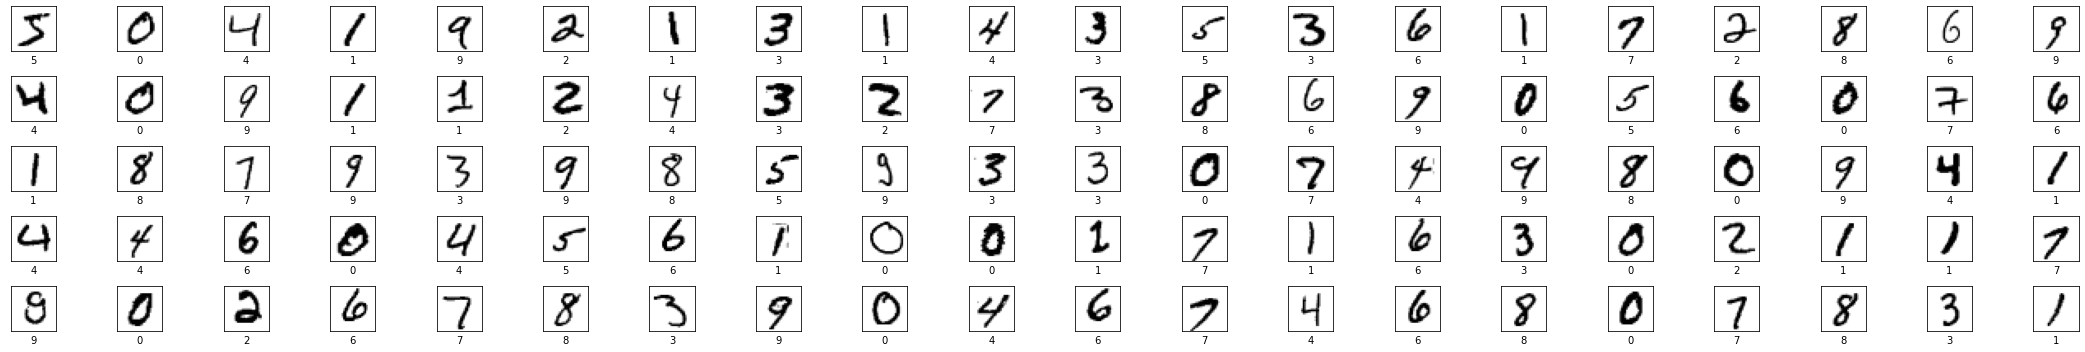

In [3]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train1[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train1[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
# Data Normalization
X_train1, X_test1 = X_train1.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test1.reshape(-1, 28,28,1).astype("float32")  / 255.0
#Without Normalization
X_train2, X_test2 = X_train2.reshape(-1, 28,28,1), X_test2.reshape(-1, 28,28,1)

In [5]:
# Normalize Data
model1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),   
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
# Using 'Adam'

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
# Normalize Data

h1 = model1.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 36s 3ms/step - loss: 0.2454 - accuracy: 0.9254 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.0771 - val_accuracy: 0.9779
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0567 - val_accuracy: 0.9834
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0431 - val_accuracy: 0.9877


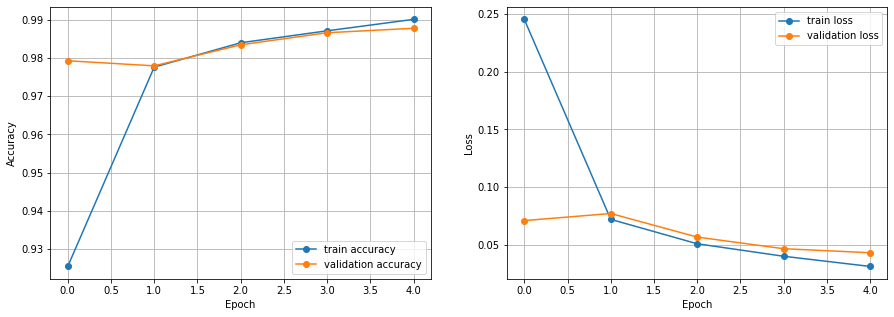

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
# Normalize Data

test_loss1, test_acc1 = model1.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9887

Test Accuracy: 0.9886999726295471

Test Loss: 0.03564967215061188


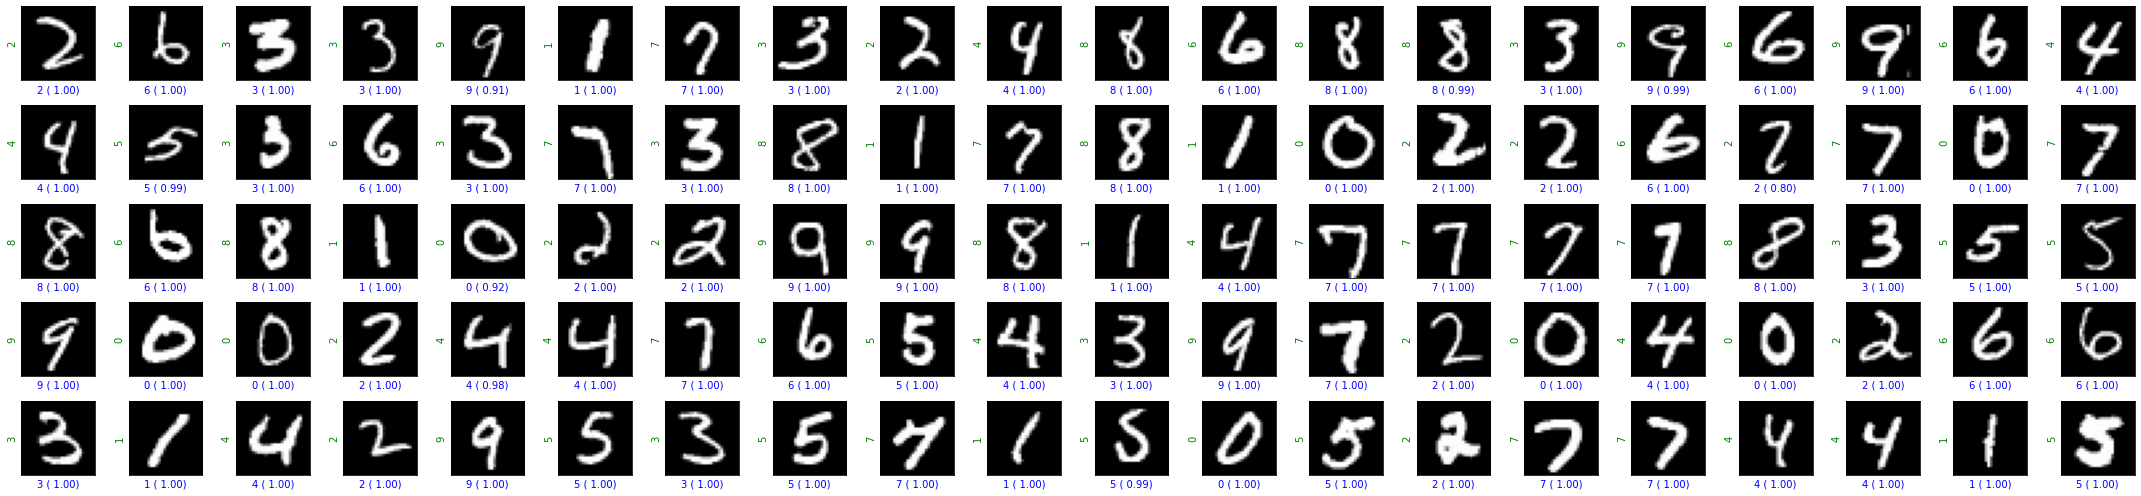

In [10]:
# Predicting Images

ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model1.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [11]:
# Without Normalize Data

model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [12]:
# Using 'Adam'

model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
# Without Normalize Data

h2 = model2.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2665 - accuracy: 0.9278 - val_loss: 0.1216 - val_accuracy: 0.9637
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0818 - accuracy: 0.9754 - val_loss: 0.0821 - val_accuracy: 0.9762
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0683 - val_accuracy: 0.9832


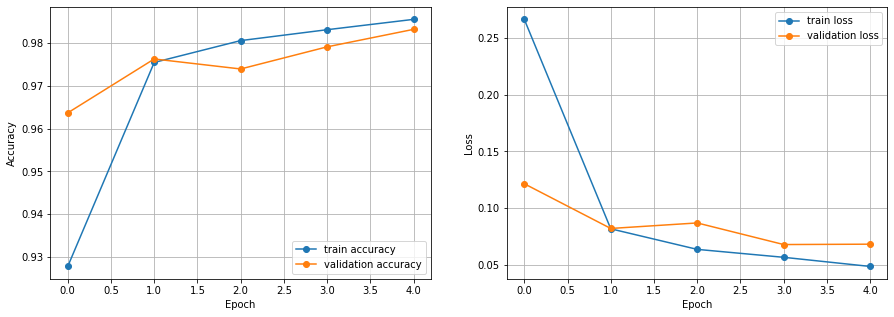

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [15]:
# Without Normalize Data

test_loss2, test_acc2 = model2.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9858

Test Accuracy: 0.98580002784729

Test Loss: 0.053898174315690994


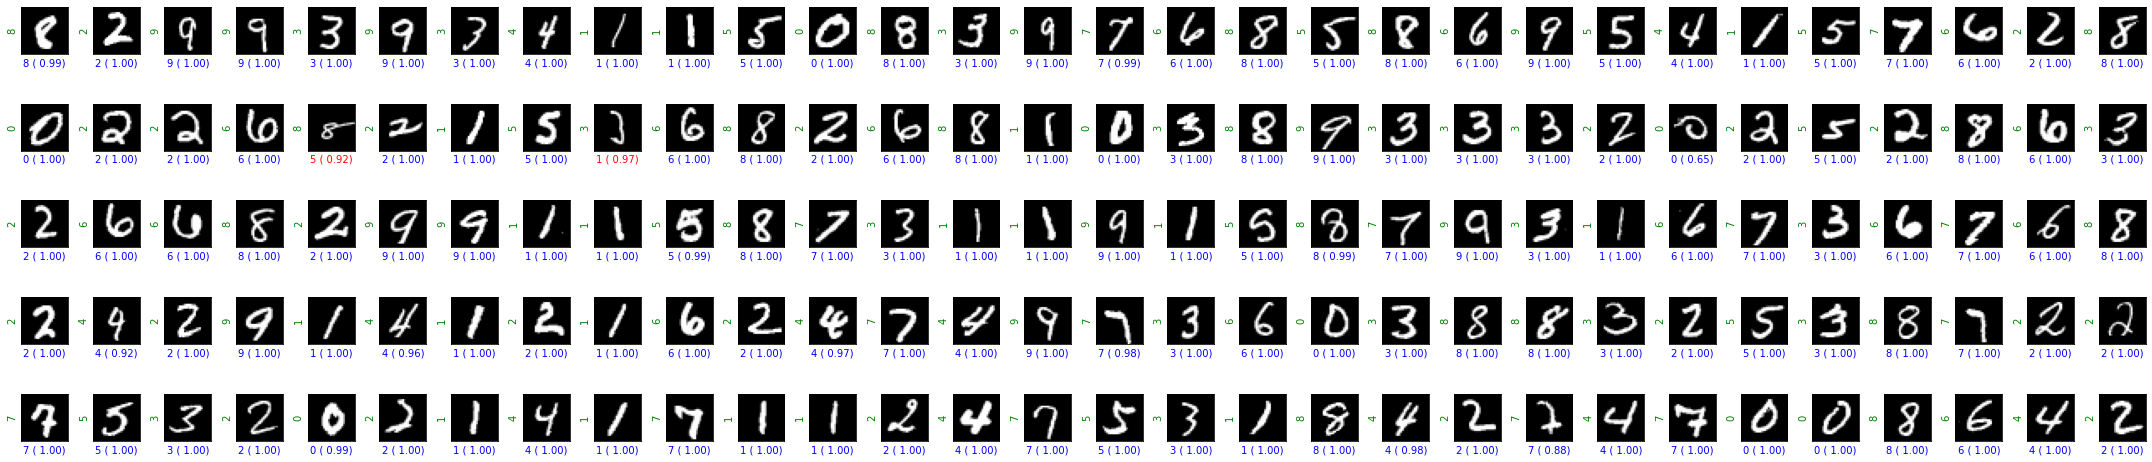

In [16]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model2.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [17]:
# Normalize Data

model3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [18]:
# Using 'SGD'

model3.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
# Normalize Data 

h3 = model3.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0054 - accuracy: 0.7335 - val_loss: 0.2450 - val_accuracy: 0.9247
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2042 - accuracy: 0.9376 - val_loss: 0.1819 - val_accuracy: 0.9440
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.1201 - val_accuracy: 0.9638
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1087 - accuracy: 0.9657 - val_loss: 0.0895 - val_accuracy: 0.9729
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9727 - val_loss: 0.0855 - val_accuracy: 0.9740


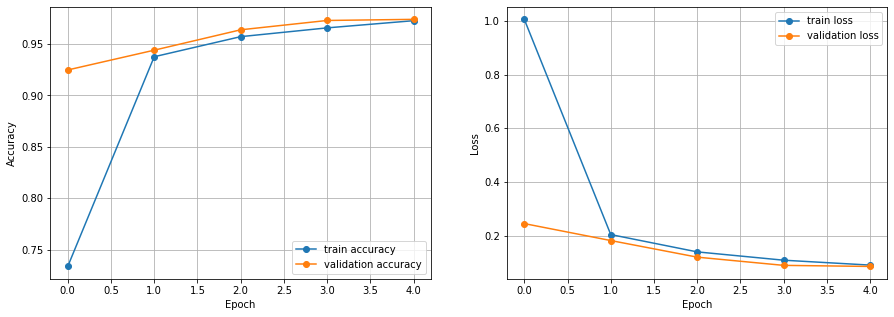

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
# Normalize Data

test_loss1, test_acc1 = model3.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9756

Test Accuracy: 0.975600004196167

Test Loss: 0.08086865395307541


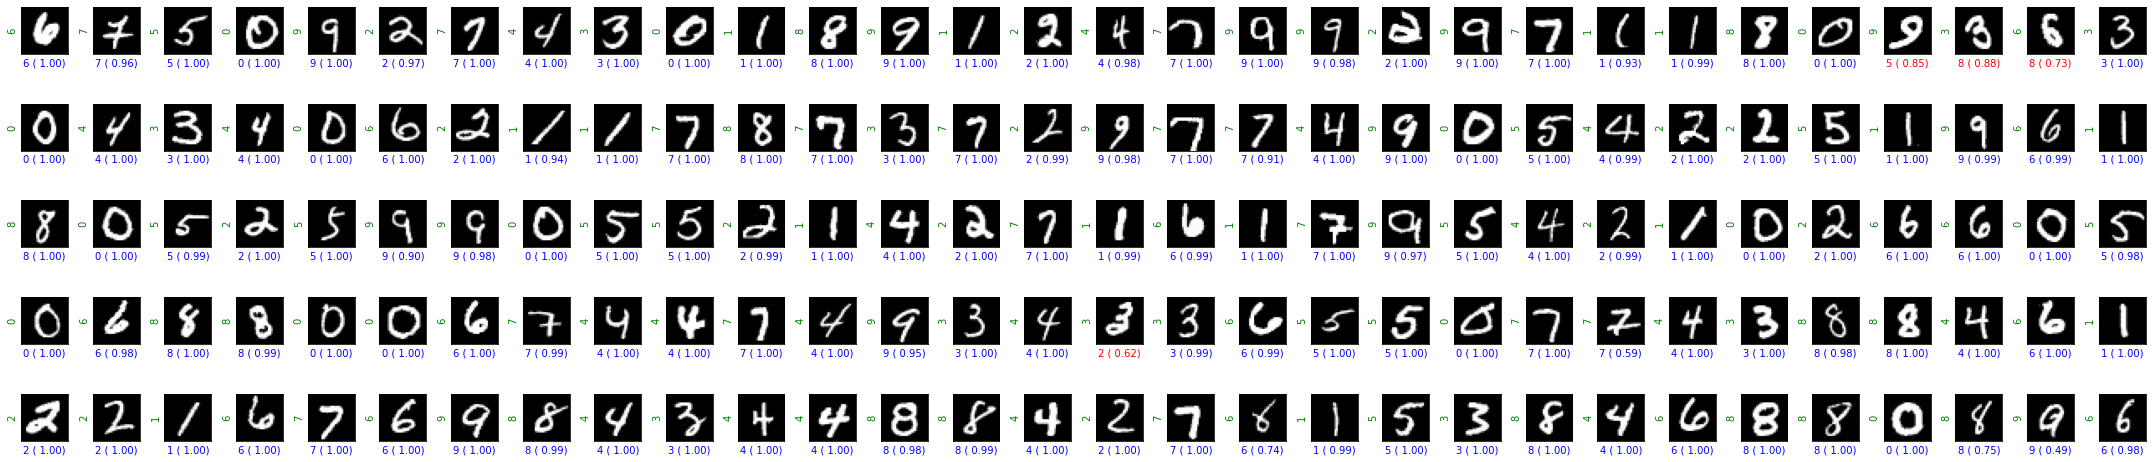

In [22]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model3.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [23]:
# Without Normalize Data

model4 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [24]:
# Using 'SGD'

model4.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
# Without Normalize Data

h4 = model4.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


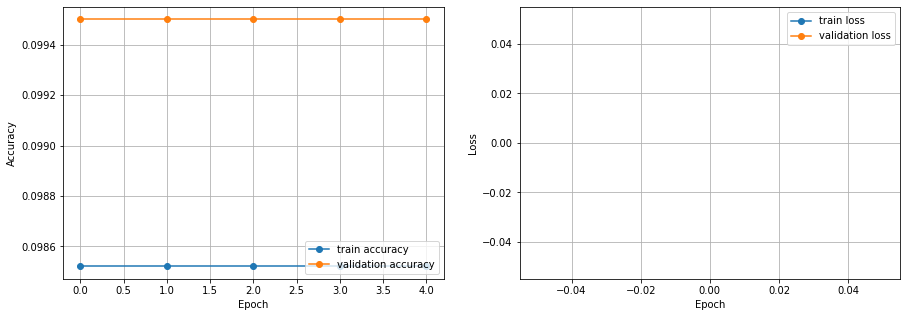

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
# Without Normalize Data

test_loss2, test_acc2 = model4.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


Got **97.82%** accuracy for SGD ( Without normalize data).

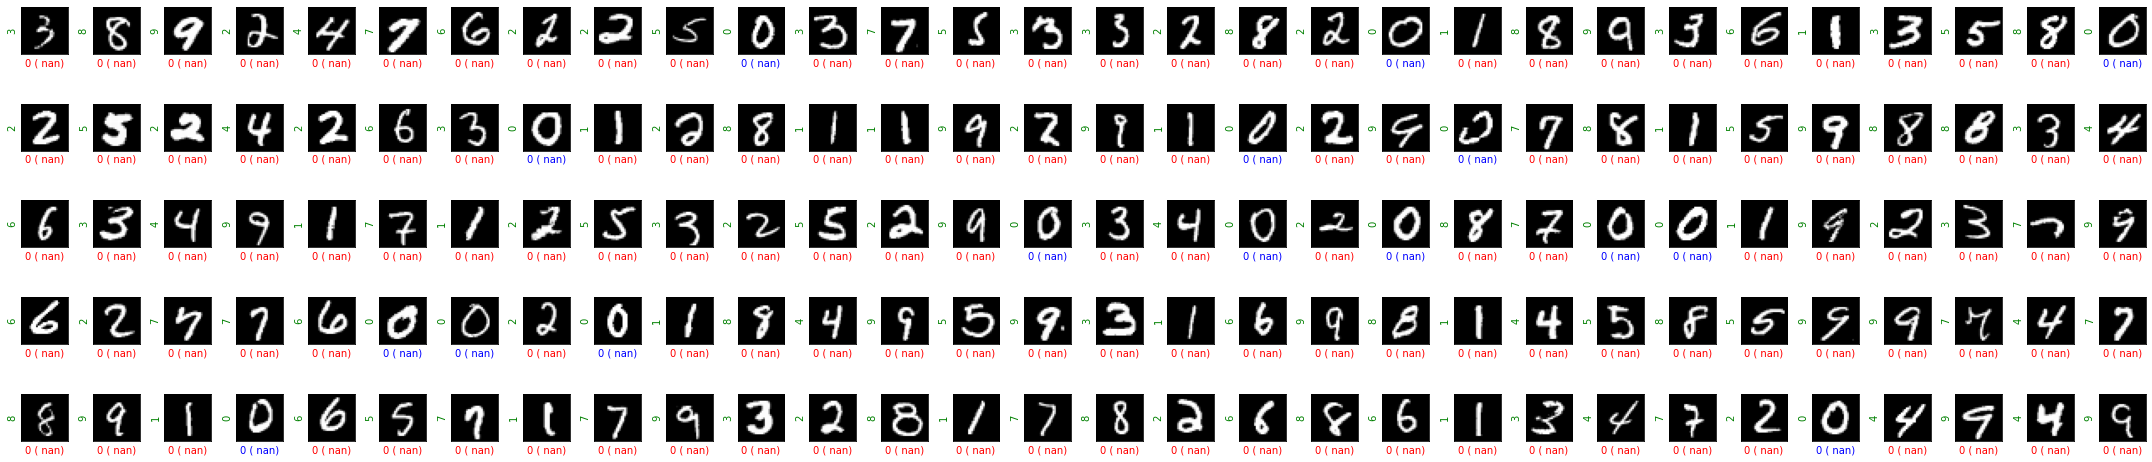

In [28]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model4.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [29]:
# Normalize Data

model5 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [30]:
# Using 'RMSProp'

model5.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [31]:
# Normalize Data

h5 = model5.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2469 - accuracy: 0.9228 - val_loss: 0.0816 - val_accuracy: 0.9773
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0793 - val_accuracy: 0.9769
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0602 - val_accuracy: 0.9835
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0396 - val_accuracy: 0.9891
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0451 - val_accuracy: 0.9877


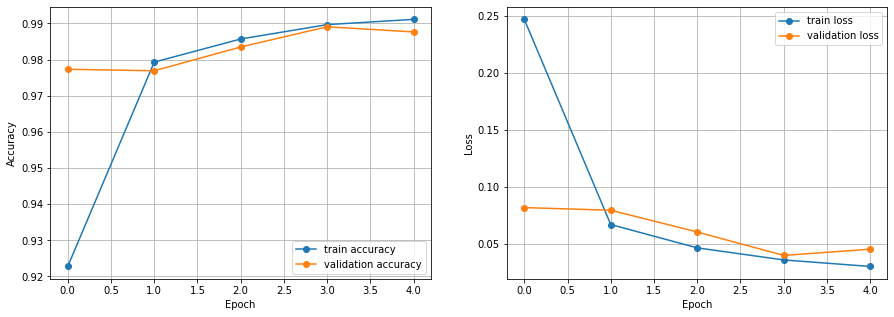

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [33]:
# Normalize Data

test_loss1, test_acc1 = model5.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9880

Test Accuracy: 0.9879999756813049

Test Loss: 0.04169757664203644


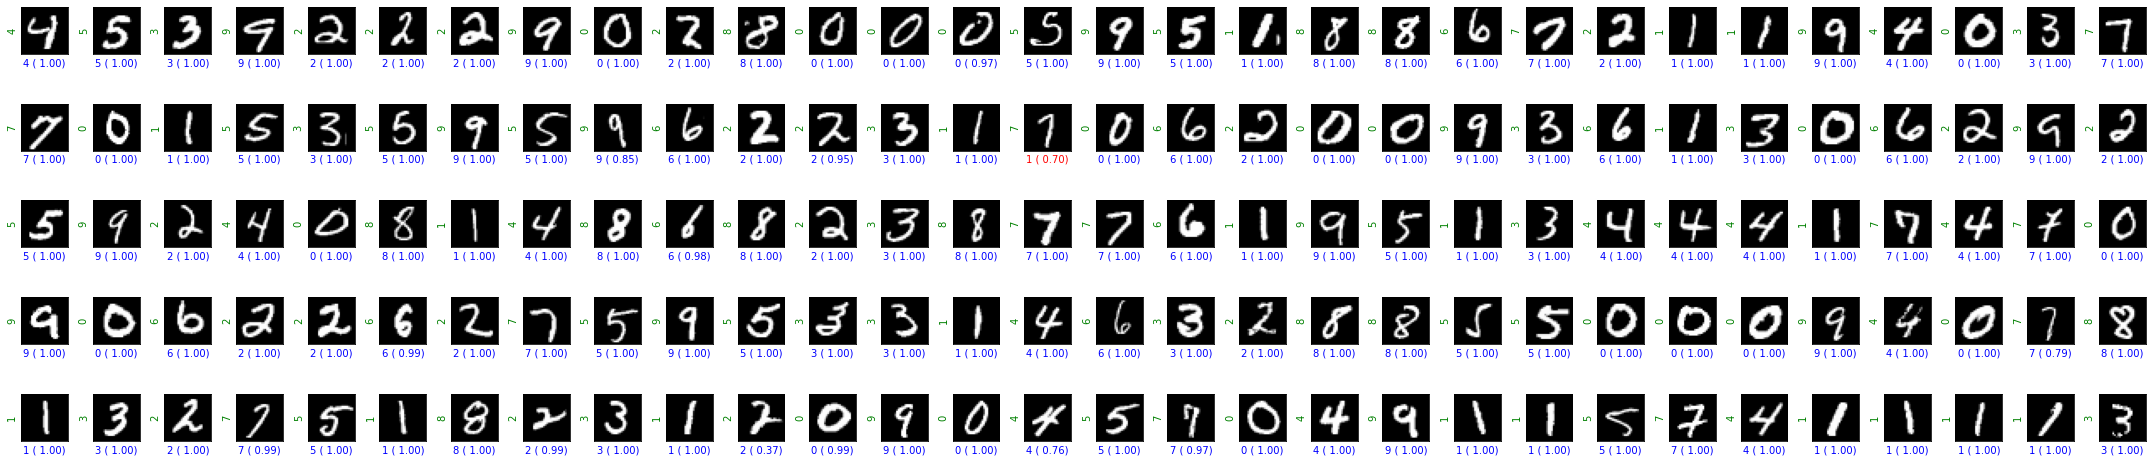

In [34]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model5.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [35]:
# Without Normalize Data

model6 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [36]:
# Using 'RMSProp'

model6.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
# Without Normalize Data

h6 = model6.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3523 - accuracy: 0.9196 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0965 - accuracy: 0.9734 - val_loss: 0.0810 - val_accuracy: 0.9780
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0794 - accuracy: 0.9790 - val_loss: 0.1193 - val_accuracy: 0.9701
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0699 - accuracy: 0.9821 - val_loss: 0.1082 - val_accuracy: 0.9768
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0698 - accuracy: 0.9836 - val_loss: 0.0934 - val_accuracy: 0.9822


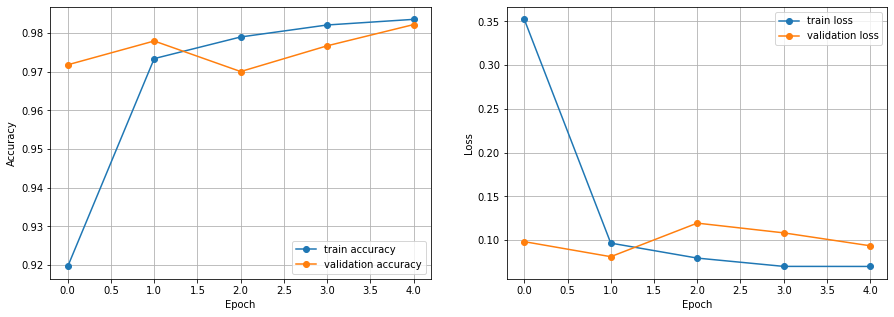

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [39]:
# Without Normalize Data

test_loss2, test_acc2 = model6.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9804

Test Accuracy: 0.980400025844574

Test Loss: 0.0999121442437172


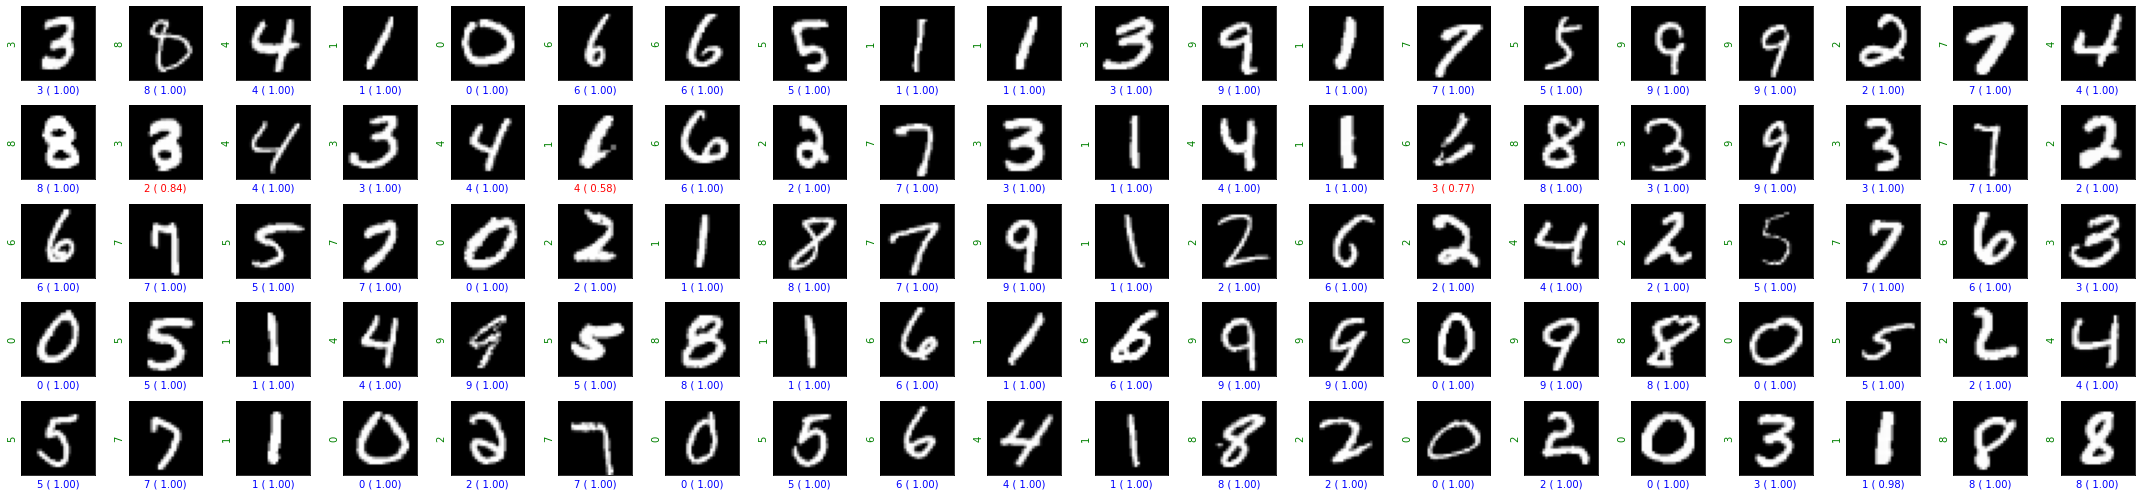

In [40]:
# Predicting Images

ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model6.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

With normalization model gives better accuracy than Without normalization and we can told that Adam is best optimizer than others.